In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
import math

# Define the sectors and their descriptions
sectors = {
    'XLB': 'Materials',
    'XLY': 'Consumer Discretionary',
    'XLF': 'Financials',
    'XLP': 'Consumer Staples',
    'XLV': 'Health Care',
    'XLU': 'Utilities',
    'XLE': 'Energy',
    'XLI': 'Industrials',
    'XLK': 'Technology',
}
start_date = '2002-01-01'
end_date = '2023-06-28'

# Define month number (1 = January, 2 = February, ..., 12 = December)
month_number = 7

# Create a mapping from month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Get the month name from the dictionary
month_name = month_names[month_number]


In [2]:
def fetch_and_prepare_data(sector_code, start_date, end_date):
    """
    Fetch data from Yahoo Finance, calculate returns, and clean it.

    Args:
    sector_code: The sector code.
    start_date: The start date.
    end_date: The end date.

    Returns:
    A DataFrame containing cleaned and processed sector data.
    """
    # Download historical data for the current sector
    data = yf.download(sector_code, start=start_date, end=end_date)

    # Calculate the daily returns
    data['return'] = data['Close'].pct_change()

    # Drop NaN values
    data = data.dropna()

    return data

def prepare_seasonality_data(df, month_number):
    """
    Prepare seasonality data.

    Args:
    df: The data DataFrame.
    month_number: The month number.

    Returns:
    A DataFrame containing the seasonality data.
    """
    # Create a DataFrame for storing values
    df = df.assign(
        month = df.index.month,
        day = df.index.day,
        positive = df['return'] > 0,
    )

    # Filter only for the desired month
    df_month = df[df['month'] == month_number]

    # Calculate the mean returns for each day
    average_returns = df_month.groupby('day')['return'].mean()

    return average_returns

# Initialize a DataFrame to store the seasonality data for each sector
seasonality_average_returns = pd.DataFrame()

# Use the keys (sector codes) for the download and calculation steps
for sector_code in sectors.keys():
    data = fetch_and_prepare_data(sector_code, start_date, end_date)
    average_returns = prepare_seasonality_data(data, month_number)
    
    # Append the data to the seasonality dataframes
    seasonality_average_returns = pd.concat([seasonality_average_returns, average_returns.rename(sectors[sector_code])], axis=1)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


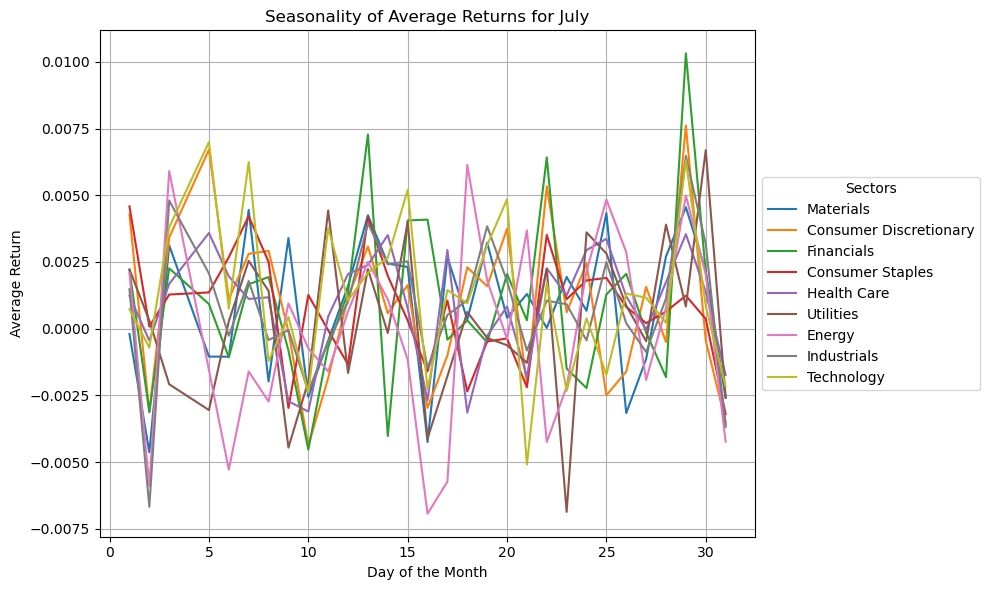

In [3]:
# Plot the seasonality of average returns
plt.figure(figsize=(10, 6))
plt.plot(seasonality_average_returns)
plt.title(f'Seasonality of Average Returns for {month_name}')
plt.xlabel('Day of the Month')
plt.ylabel('Average Return')

# When creating the legend, the sector descriptions will be used
plt.legend(seasonality_average_returns.columns, loc='center left', bbox_to_anchor=(1, 0.5), title="Sectors")

plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
seasonality_average_returns

,Materials,Consumer Discretionary,Financials,Consumer Staples,Health Care,Utilities,Energy,Industrials,Technology
1,-0.000201,0.004283,0.002196,0.004581,0.001227,0.002220,0.002080,0.001476,0.000728
2,-0.004633,-0.003125,-0.003130,0.000078,-0.000448,0.000298,-0.005894,-0.006677,-0.000713
3,0.003120,0.003412,0.002261,0.001278,0.001677,-0.002087,0.005905,0.004799,0.003802
5,-0.001048,0.006714,0.000919,0.001356,0.003586,-0.003052,-0.001557,0.002068,0.006995
6,-0.001053,0.001107,-0.001075,0.002678,0.001958,0.000279,-0.005286,-0.000264,0.000749
7,0.004449,0.002803,0.001665,0.004214,0.001113,0.002541,-0.001606,0.001784,0.006240
8,-0.001982,0.002914,0.001931,0.002503,0.001175,0.001415,-0.002732,-0.000427,-0.001218
9,0.003398,-0.000100,-0.000818,-0.002973,-0.002722,-0.004461,0.000945,-0.000056,0.000436
10,-0.002562,-0.004388,-0.004533,0.001259,-0.003107,-0.001973,-0.000740,-0.002353,-0.002406
11,-0.000449,-0.001849,-0.000690,-0.000064,0.000458,0.004431,-0.001602,-0.000487,0.003772


In [5]:
# Initialize a DataFrame to store the seasonality data for each sector
seasonality_average_returns = pd.DataFrame()

# Store all days to get common days across all sectors
all_days = []

# Use the keys (sector codes) for the download and calculation steps
for sector_code in sectors.keys():
    data = fetch_and_prepare_data(sector_code, start_date, end_date)
    df = prepare_seasonality_data(data, month_number)
    
    # Get unique days and append to all_days list
    all_days.append(set(df.index.unique()))

    # Append the data to the seasonality dataframes
    seasonality_average_returns = pd.concat([seasonality_average_returns, df.rename(sectors[sector_code])], axis=1)

# Get common days across all sectors
common_days = list(set.intersection(*all_days))

# Filter dataframe for common days only
seasonality_average_returns = seasonality_average_returns.loc[common_days]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


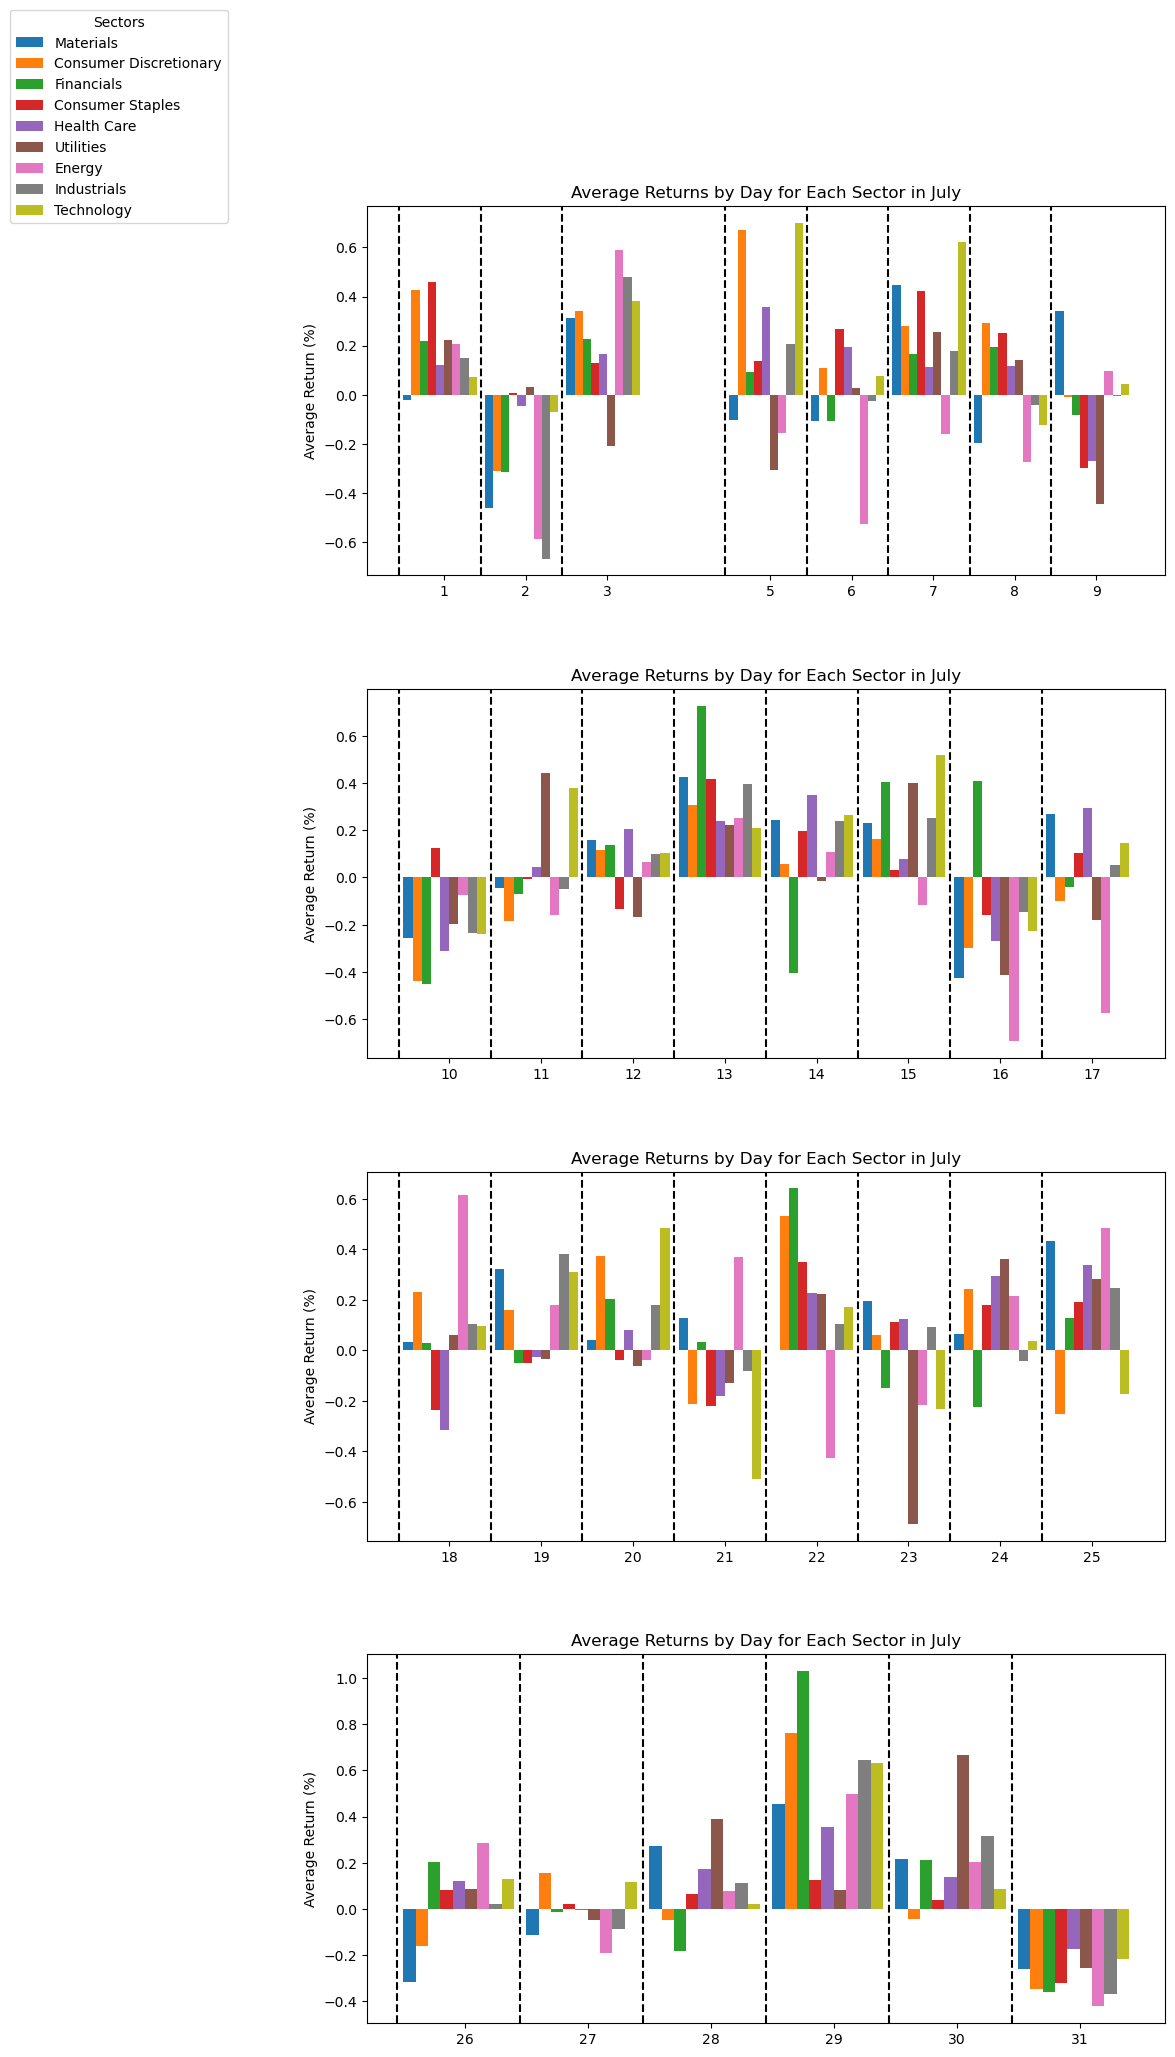

In [6]:
# Number of sectors
N = len(sectors)

# Number of days in a month
days = np.array(sorted(common_days))

# Calculate the width of each bar
width = 1.0 / (N + 1)

# Number of subplots (weeks)
num_subplots = 4

# Days per subplot
days_per_subplot = math.ceil(len(days) / num_subplots)

# Create a new figure with multiple subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(10, 20))

# For each week
for i in range(num_subplots):
    start_day = i * days_per_subplot
    end_day = start_day + days_per_subplot if start_day + days_per_subplot < len(days) else len(days)

    # For each sector, create a bar plot
    for j, sector in enumerate(seasonality_average_returns.columns):
        # Multiply returns by 100 to get percentages
        axs[i].bar(days[start_day:end_day] + j * width, seasonality_average_returns[sector].iloc[start_day:end_day] * 100, 
                   width=width, label=sector)
    
    # Set the x-ticks to be the days + half the width of a bar. This centers the x-ticks.
    axs[i].set_xticks(days[start_day:end_day] + width * N / 2)
    axs[i].set_xticklabels(days[start_day:end_day])
    
    # Set the y-label
    axs[i].set_ylabel('Average Return (%)')

    # Set the title
    axs[i].set_title('Average Returns by Day for Each Sector in ' + month_name)

    # Draw vertical lines
    for day in days[start_day:end_day]:
        axs[i].axvline(x=day - width, color='k', linestyle='--')

# Add a legend to the figure
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(0, 1), title="Sectors")

# Adjust spacing between subplots
fig.tight_layout(pad=5.0)

# Show the plot
plt.show()